In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import json

Un modelo de keras puede ser secuencial o functional. Que sea secuencial quiere decir que es un modelo relativamente básico sin muchos features.

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn import metrics

Acá se importa el dataset load_breast_cancer ya que la finalidad de este modelo es predecir si es un cáncer benigno o un cáncer maligno.

In [3]:
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=.3, random_state=42)

In [4]:
pd.DataFrame(cancer.data).head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
model = Sequential()
model.add(Dense(15, input_dim=30, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

En este punto se inicializa nuestro modelo **secuencial** sin ningún parámetro que no sea default.
Luego, añadimos un layer que va a contener 15 neuronas, y nosotros tenemos 30 atributos, es decir una neurona cada dos features.
El **Dense** layer significa que es *fully connected* layer. Entonces en este caso particular, cada neurona estará totalmente conectada a los 30 features de input.
Luego, tendremos un *output layer* de una sola neurona, que tendrá como función de activación a la función sigmoid, la cual tomará el valor y lo convertirá en un valor binario (1, 0)


In [6]:
model.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

Acá toca el segundo paso, la compilación. En este punto se pasan como parámteros la función de pérdida, el optimizador y la métrica que se evaluará.
**binary_crossentropy** es la función standard para problemas de clasificación binaria.
**rmsprop** es una actualización optimizada del algoritmo.
**accuracy** mide la exactitud entre los valores

In [7]:
history = model.fit(X_train, y_train, epochs=20, batch_size=50)

json_file = open("ANN_history.json", "w")
json.dump(history.history, json_file)
json_file.close()

model.save("ANN_model")

Epoch 1/20
8/8 [==============================] - 0s 960us/step - loss: 66.9058 - accuracy: 0.3744
Epoch 2/20
8/8 [==============================] - 0s 779us/step - loss: 44.8403 - accuracy: 0.3744
Epoch 3/20
8/8 [==============================] - 0s 768us/step - loss: 28.2735 - accuracy: 0.3744
Epoch 4/20
8/8 [==============================] - 0s 718us/step - loss: 13.0740 - accuracy: 0.3894
Epoch 5/20
8/8 [==============================] - 0s 758us/step - loss: 2.9172 - accuracy: 0.6709
Epoch 6/20
8/8 [==============================] - 0s 707us/step - loss: 1.1741 - accuracy: 0.8518
Epoch 7/20
8/8 [==============================] - 0s 717us/step - loss: 1.0408 - accuracy: 0.8769
Epoch 8/20
8/8 [==============================] - 0s 742us/step - loss: 1.0493 - accuracy: 0.8819
Epoch 9/20
8/8 [==============================] - 0s 703us/step - loss: 0.9568 - accuracy: 0.8719
Epoch 10/20
8/8 [==============================] - 0s 710us/step - loss: 1.0163 - accuracy: 0.8668
Epoch 11/20
8/8

Acá se entrena al modelo y se pasan como parámetros: *Train features*, *Train outputs*, *epochs* y *batch_size*
**epochs** indica la cantidad de veces que se va a realizar el *foward propagation* y *backward propagation* en el modelo
**batch_size** dice de a cuantos datos ir pasando al modelo.
Acá como resultados, podemos ver que el algoritmo a medida que se ejecuta (los *epochs*), va aprendiendo. El accuracy sube y la pérdida se ve reducida.

Text(0.5, 1.0, 'Loss vs Accuracy')

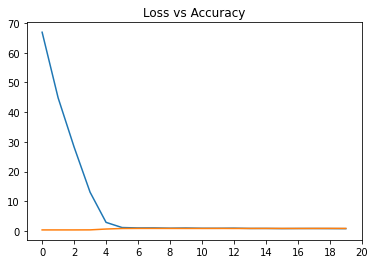

In [8]:
plt.plot(history.history["loss"], label="Loss")
plt.plot(history.history["accuracy"], label="Accuracy")
plt.xticks(range(0,21, 2))
plt.title("Loss vs Accuracy")

In [9]:
predictions = model.predict_classes(X_test)
predictions_proba = model.predict_proba(X_test)
predictions[:5], predictions_proba[:5]

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Instructions for updating:
Please use `model.predict()` instead.


(array([[0],
        [0],
        [0],
        [1],
        [1]], dtype=int32),
 array([[1.1485010e-02],
        [4.1482529e-38],
        [2.8173204e-14],
        [9.9999940e-01],
        [9.9999595e-01]], dtype=float32))

In [10]:
history.history

{'loss': [66.90582275390625,
  44.84028625488281,
  28.27347755432129,
  13.073954582214355,
  2.917238473892212,
  1.1741127967834473,
  1.0408012866973877,
  1.0493085384368896,
  0.9568497538566589,
  1.0163277387619019,
  0.9325693249702454,
  0.9220734238624573,
  0.9653641581535339,
  0.8695782423019409,
  0.8731582760810852,
  0.8222607374191284,
  0.8504917025566101,
  0.8521819114685059,
  0.8291455507278442,
  0.8034445643424988],
 'accuracy': [0.37437185645103455,
  0.37437185645103455,
  0.37437185645103455,
  0.38944724202156067,
  0.6708542704582214,
  0.8517587780952454,
  0.876884400844574,
  0.8819095492362976,
  0.8718593120574951,
  0.8668341636657715,
  0.8643215894699097,
  0.8793969750404358,
  0.8592965006828308,
  0.8668341636657715,
  0.8743718862533569,
  0.8718593120574951,
  0.8618090748786926,
  0.8718593120574951,
  0.8869346976280212,
  0.876884400844574]}

Acá utilizamos *predict_classes* para determinar las clases respectivas a cada predicción con los datos de prueba.

In [11]:
print("Accuracy: ", metrics.accuracy_score(y_true=y_test, y_pred=predictions))
print(metrics.classification_report(y_true=y_test, y_pred=predictions))

Accuracy:  0.9298245614035088
              precision    recall  f1-score   support

           0       0.88      0.94      0.91        63
           1       0.96      0.93      0.94       108

    accuracy                           0.93       171
   macro avg       0.92      0.93      0.93       171
weighted avg       0.93      0.93      0.93       171



Acá utilizamos el módulo de métricas de sklearn, donde el primero nos dice el accuracy comparando los resultados predichos por el modelo con los verdadeos.
Y classification_report nos da unas métricas más detalladas, donde podemos observar que la precision para los pacientes que tienen cáncer maligno es del 85%, y con una cantidad de estos de 108 pacientes. Esto no son buenas métricas.

Text(0.5, 1.0, 'Confusion matrix for ANN')

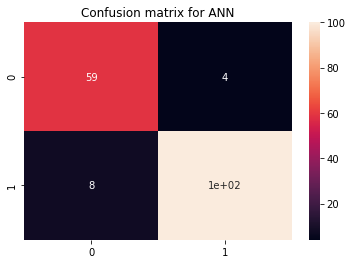

In [12]:
import seaborn as sns
sns.heatmap(metrics.confusion_matrix(y_pred=predictions, y_true=y_test), annot=True)
plt.title("Confusion matrix for ANN")